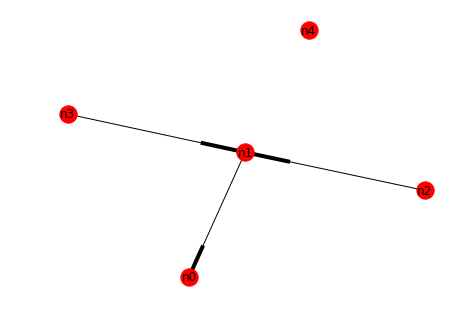

In [3]:
import random 
import networkx as nx
randint = random.randint
class RandomDAG:
    def __init__(self, nodes, n_edges):

        self.n_nodes = len(nodes)
        self.nodes = nodes
        self.n_edges = n_edges

        if n_edges > self.n_nodes * (self.n_nodes - 1):
            self.n_edges = self.n_nodes * (self.n_nodes - 1)

        self.randDAG = nx.DiGraph()

    # connected graph req (n-1) edges at least
    # DAG can't be more than n(n-1) edges
    # https://ipython.org/ipython-doc/3/parallel/dag_dependencies.html

    def random_dag(self):

        """Generate a random Directed Acyclic Graph (DAG) with a given number of nodes and edges."""
        # add nodes, labeled 0...nodes:
        for i in range(self.n_nodes):
            self.randDAG.add_node(self.nodes[i])

        child_parent = {}

        # to avoid infinit loop, need to have better solution
        round = 1000
        while self.n_edges > 0 and round > 0:
            round -= 1

            a = random.choice(self.nodes)            
            b = random.choice(self.nodes)
            while a == b or self.randDAG.has_edge(a, b):
                b = random.choice(self.nodes)
                
            self.randDAG.add_edge(a, b)
            if nx.is_directed_acyclic_graph(self.randDAG):
                self.n_edges -= 1
                parent = child_parent.get(b)
                if parent is None:
                    parent = [a]
                else:
                    parent.append(a)
                child_parent[b] = parent
                # print(a,"-> ", b)
            else:
                # we closed a loop!
                self.randDAG.remove_edge(a, b)
                
        return self.randDAG, child_parent
        
    def dag_longest_path(self, DAG):
        return nx.dag_longest_path(DAG)
    
nodes  = ['n0', 'n1', 'n2', 'n3', 'n4']

rdag = RandomDAG(nodes, n_edges = 3)
g,p = rdag.random_dag()
nx.draw(g,with_labels = True)
